In [1]:
from covidtracker import CovidTracker
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cd = CovidTracker()

In [3]:
cd.load_counties()

In [4]:
mrd=cd.getmostrecentdate()
mrd

'2020-06-02'

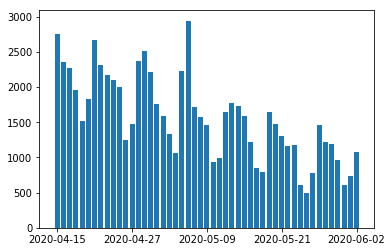

In [5]:
cd.plotdiffseries(startdate='2020-04-15', stat='deaths')

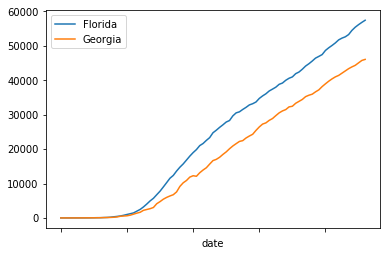

In [12]:
cd.plot_state(['Florida','Georgia'], stat='cases')

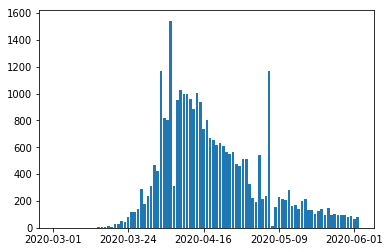

In [13]:
cd.plotdiffseries_state('New York', stat='deaths')

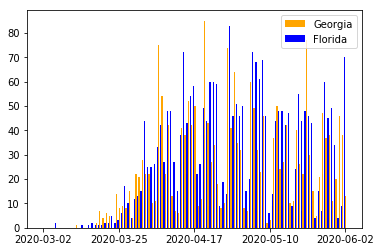

In [15]:
cd.plotdiffseriescompare_state('Georgia', 'Florida', stat='deaths')

In [ ]:
d = cd.getdiffseries_state('Pennsylvania', stat='cases').rename('PA').loc['2020-05-01':]
c = cd.getdiffseries_state('Michigan', stat='cases').rename('MI')
joined = pd.concat([d,c], axis=1, join='inner')
joined.columns[0]

In [ ]:
ax = plt.subplot('111')
b1 = ax.bar(joined.index, joined['PA'], align='edge', width=0.4, color='orange')
b1.set_label('PA')
b2 = ax.bar(joined.index, joined['MI'], align='edge', width=-0.4, color='blue')
b2.set_label('MI')
ax.legend()
xlabels = joined.index[::int(len(joined.index)/4)]
plt.xticks(xlabels, xlabels)
plt.show()

In [ ]:
cd.plot_state(['California','Pennsylvania'], stat='cases')

In [ ]:
fla = cd.getstateframe('Florida', group_counties=False)
fla.diff()

In [ ]:
cd.plot_county([('New York', 'Saratoga'),
   ('New York', 'Dutchess'),('New York', 'Washington')])

In [ ]:
dperc = cd.getdeathspercase('2020-06-01')
dperc = dperc.loc[dperc['cases']>2000]
dperc.sort_values('deaths per case', ascending=False)

In [ ]:
dateframe = cd.getdateframe('2020-06-01')

In [ ]:
diff = cd.getperiodchange('2020-06-01', 14, stat='deaths').replace([np.inf], 0).dropna()
diff.groupby('state').sum().sort_values(ascending=False)

In [ ]:
nyc = cd.getcountyframe('New York', 'New York City')
ckco = cd.getcountyframe('Illinois', 'Cook')

In [ ]:
ckco = ckco.set_index('date')
nyc = nyc.set_index('date')

In [ ]:
ckco_cases = ckco['cases'].rename('ck')
nyc_cases = nyc['cases'].rename('ny')
ckco_deaths = ckco['deaths'].rename('ck')
nyc_deaths = nyc['deaths'].rename('ny')

In [ ]:
ck_vs_ny=pd.concat([ckco_deaths, nyc_deaths], axis=1, join='inner')

In [ ]:
ck_vs_ny.plot()

In [ ]:
franklin = cd.getcountyframe('Ohio', 'Franklin')

In [ ]:
dperc = franklin['deaths']/franklin['cases']

In [ ]:
locals()